<a href="https://colab.research.google.com/github/worachot-n/Transformer-Tutorial/blob/main/Transformer_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


# Transformer Pipeline

In [3]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [4]:
!pip install transformers --quiet
!pip install sentencepiece --quiet

##Text-Classification

In [5]:
from transformers import pipeline

In [6]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [7]:
import pandas as pd
outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


##Named Entity Recognition

In [8]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


In [9]:
outputs = ner_tagger(text)
pd.DataFrame(outputs)

,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590255,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


##Question Answering

In [10]:
reader = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [11]:
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


##Summarization

In [12]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=56, clean_up_tokenization_spaces=True)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [13]:
print(outputs[0]['summary_text'])

 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I


##Translation

In [14]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")

In [15]:
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von Ihnen zu hören. Aufrichtig, Bumblebee.


In [16]:
from transformers import pipeline
translator_de = pipeline(task='translation_en_to_de')

text_en = "The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[6] The outbreak was first identified in Wuhan, Hubei, China, in December 2019. The World Health Organization (WHO) declared the outbreak to be a Public Health Emergency of International Concern on 30 January 2020 and recognized it as a pandemic on 11 March.[7][8] As of 30 March 2020, more than 745,000[4] cases of COVID-19 have been reported in over 190 countries and territories, resulting in approximately 35,000[4] deaths. More than 156,500[4] people have since recovered.[5]"

translation_list = []
text_list = text_en.split('.')

for text in text_list:
    translation_list.append(translator_de(text + '.'))

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


In [17]:
print(translation_list)

[[{'translation_text': 'Die Koronavirus-Pandemie 2019–20 ist eine anhaltende Pandemie der Koronavirus-Krankheit 2019 (COVID-19), verursacht durch das schwere akute Atemwegssyndrom Koronavirus 2 (SARS-CoV-2).'}], [{'translation_text': '[6] Der Ausbruch wurde erstmals im Dezember 2019 in Wuhan, Hubei, China, festgestellt.'}], [{'translation_text': 'Die Weltgesundheitsorganisation (WHO) hat den Ausbruch am 30. Januar 2020 als öffentlichen Gesundheitsnotstand von internationaler Bedeutung erklärt und ihn am 11. März als Pandemie anerkannt.'}], [{'translation_text': '[7][8] Zum 30. März 2020 wurden in über 190 Ländern und Gebieten mehr als 745 000 Fälle von COVID-19 gemeldet, was zu etwa 35 000 Todesfällen führte.'}], [{'translation_text': 'Mehr als 156.500[4] Menschen haben sich seitdem erholt.'}], [{'translation_text': '[5].'}]]


##Text Generation

In [18]:
generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


In [19]:
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[5]

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. My order did not arrive in time for the holiday weekend. During the holiday you asked again for different information. I apologize at first, but your response is very helpful. I made the purchase at an on-line checkout, a lot of different items (more than a few hundred) went into the package and I wasn't given the information on the same line. After some research into who was responsible for mixing up the order, my original order was not received. My order had originally arrived from Texas but was picked up at 8:00 and then delivered by 3:45 pm and a few hours later, I received a box containing a plastic check and a handwritten note.

I am deeply sorry that the order and instructions were not being sent as quickly as you stated in the e-mail. Thank you for your patience on my behalf and for helping me


#Hugging Face Datasets

In [20]:
!pip install datasets --quiet

In [21]:
from datasets import list_datasets
all_datasets = list_datasets()

In [22]:
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 12138 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [23]:
from datasets import load_dataset
emotions = load_dataset("emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [25]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [26]:
len(train_ds)

16000

In [27]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [28]:
train_ds.column_names

['text', 'label']

In [29]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [30]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [31]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


set_format: https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.set_format

In [32]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [33]:
emotions["train"].features["label"]

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)

When you retrieve the labels, ClassLabel.int2str() and ClassLabel.str2int() carries out the conversion from integer value to label name, and vice versa

In [34]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [35]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


value_counts: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [36]:
df["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

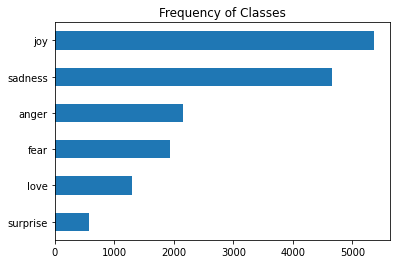

In [37]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


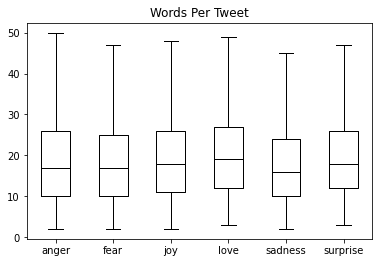

In [38]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

#From Text to Tokens

##Character Tokenization

In [39]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


This is a good start, but we’re not done yet. Our model expects each character to be
converted to an integer, a process sometimes called numericalization. One simple way
to do this is by encoding each unique token (which are characters in this case) with a
unique integer:

In [40]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [41]:
print(len(token2idx))

20


In [42]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [43]:
print(len(input_ids))

38


In [44]:
categorical_df = pd.DataFrame(
{"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


get_dummies: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


In [45]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


The rows of this DataFrame are the one-hot vectors, which have a single “hot” entry
with a 1 and 0s everywhere else. Now, looking at our input_ids, we have a similar
problem: the elements create an ordinal scale. This means that adding or subtracting
two IDs is a meaningless operation, since the result is a new ID that represents
another random token.

torch.nn.functional: https://pytorch.org/docs/stable/nn.functional.html#torch-nn-functional

In [46]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116 --quiet

In [47]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

len(token2idx) = 20

len(input_ids) = 38

In [48]:
one_hot_encodings

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [49]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


##Word Tokenization

In [50]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


##Subword Tokenization

In [51]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [52]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


convert_ids_to_tokens: https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.convert_ids_to_tokens

In [53]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


convert_tokens_to_string: https://huggingface.co/docs/transformers/internal/tokenization_utils#transformers.PreTrainedTokenizerBase.convert_tokens_to_string

In [54]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [55]:
tokenizer.vocab_size

30522

model_max_length: https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer

In [56]:
tokenizer.model_max_length

512

In [57]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

##Tokenizing the Whole Dataset

In [58]:
from datasets import load_dataset
emotions = load_dataset("emotion")

  0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [60]:
emotions["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [61]:
type(emotions["train"][:2]["text"])

list

In [62]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Here we can see the result of padding: the first element of input_ids is shorter than
the second, so zeros have been added to that element to make them the same length.
These zeros have a corresponding [PAD] token in the vocabulary, and the set of spe‐
cial tokens also includes the [CLS] and [SEP] tokens that we encountered earlier:
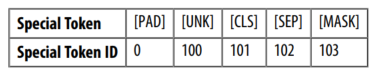

dataset = dataset.map(lambda e: tokenizer(e['sentence1'], truncation=True, padding='max_length'), batched=True)

In [63]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [64]:
print(emotions_encoded["train"].column_names)

['attention_mask', 'input_ids', 'label', 'text']


#Training a Text Classifier

##Using pretrained models

In [65]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##Extracting the last hidden states

In [66]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [67]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [68]:
inputs.input_ids.numpy()

array([[ 101, 2023, 2003, 1037, 3231,  102]])

In [69]:
tokens_text = tokenizer.convert_ids_to_tokens(inputs.input_ids.numpy().squeeze())
print(tokens_text)

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']


In [70]:
text_return = tokenizer.convert_tokens_to_string(tokens_text)
print(text_return)

[CLS] this is a test [SEP]


In [71]:
#inputs = inputs.to(device)
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [72]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [73]:
for k,v in inputs.items():
  print(k)
  print(v)

input_ids
tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0')
attention_mask
tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')


In [74]:
outputs.last_hidden_state.size()
#[batch_size, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

In [75]:
outputs.last_hidden_state[:,0].size()
#[batch_size, hidden_dim] -> [CLS] token 

torch.Size([1, 768])

In [76]:
def extract_hidden_states(batch):
  # Place model inputs on the GPU
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  # Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [77]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [78]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
})

In [79]:
emotions_encoded["train"]["input_ids"][0]

tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

In [80]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [81]:
emotions_hidden["train"].column_names

['attention_mask', 'hidden_state', 'input_ids', 'label', 'text']

In [82]:
emotions_hidden["train"]["hidden_state"].shape

torch.Size([16000, 768])

##Creating a feature matrix

In [83]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

##Visualizing the training set

In [84]:
# !pip uninstall umap

In [85]:
!pip install pynndescent --quiet
!pip install numba --quiet
!pip install scipy --quiet
!pip install scikit-learn --quiet
!pip install umap-learn --quiet
!pip install transformers[tf,torch,sentencepiece,vision,optuna,sklearn,onnxruntime]==4.11.3 --quiet
!pip install datasets[audio]==1.16.1 --quiet
!pip install matplotlib --quiet
!pip install ipywidgets --quiet

In [86]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = umap.UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.717510,6.920718,0
1,-2.423651,6.715116,0
2,5.420708,3.410718,3
3,-2.292985,3.719785,2
4,-2.943725,4.517552,3


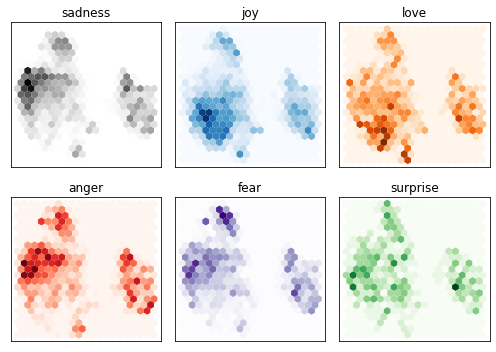

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

##Training a simple classifier

Let’s use these hidden
states to train a logistic regression model with Scikit-learn. Training such a simple
model is fast and does not require a GPU:

In [88]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.634

In Scikit-learn there is a DummyClassifier that can be used
to build a classifier with simple heuristics such as always choosing the majority class
or always drawing a random class. In this case the best-performing heuristic is to
always choose the most frequent class, which yields an accuracy of about 35%:

In [89]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)
0.352

0.352

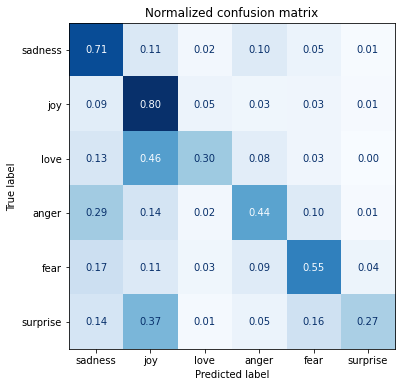

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)